In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

In [3]:
PATH = "../datasets/tradhist.csv"
df = pd.read_csv(PATH)

/var/folders/qc/xp9q1kcj79315fgc2jdgwtv00000gn/T/ipykernel_19560/562444793.py:2: DtypeWarning: Columns (8,12,14,21,24,28,33,45,46,51) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(PATH)


In [48]:
df_new = df.loc[(df["iso_o"] == "USA") & (df["iso_d"] == "CHN")]

In [49]:
df_new

,Unnamed: 0,iso_o,iso_d,year,FLOW,FLOW_0,SOURCE_TF,GDP_o,SOURCE_GDP_o,GDP_d,...,CONTI_o,CONTI_d,REGIO_o,REGIO_d,OECD_o,OECD_d,EU_o,EU_d,GATT_o,GATT_d
2332062,2332062,USA,CHN,1827,4.052000e+05,NaN,USA HIST STAT,1.855816e+08,USA MEASURING,NaN,...,AMERI,ASIA,NORAM,ESTASI,NaN,NaN,NaN,NaN,NaN,NaN
2332063,2332063,USA,CHN,1828,4.058000e+05,NaN,USA HIST STAT,1.820013e+08,USA MEASURING,NaN,...,AMERI,ASIA,NORAM,ESTASI,NaN,NaN,NaN,NaN,NaN,NaN
2332064,2332064,USA,CHN,1829,2.057000e+05,NaN,USA HIST STAT,1.913010e+08,USA MEASURING,NaN,...,AMERI,ASIA,NORAM,ESTASI,NaN,NaN,NaN,NaN,NaN,NaN
2332065,2332065,USA,CHN,1830,2.100000e+05,NaN,USA HIST STAT,2.146200e+08,USA MEASURING,NaN,...,AMERI,ASIA,NORAM,ESTASI,NaN,NaN,NaN,NaN,NaN,NaN
2332066,2332066,USA,CHN,1831,4.116000e+05,NaN,USA HIST STAT,2.165016e+08,USA MEASURING,NaN,...,AMERI,ASIA,NORAM,ESTASI,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2332245,2332245,USA,CHN,2010,6.598572e+10,NaN,DOTS_IP,9.684627e+12,WDI,3.908740e+12,...,AMERI,ASIA,NORAM,ESTASI,1.0,0.0,0.0,0.0,1.0,1.0
2332246,2332246,USA,CHN,2011,7.437514e+10,NaN,DOTS_IP,9.685374e+12,WDI,4.676334e+12,...,AMERI,ASIA,NORAM,ESTASI,1.0,0.0,0.0,0.0,1.0,1.0
2332247,2332247,USA,CHN,2012,8.143390e+10,NaN,DOTS_IP,1.022704e+13,WDI,5.356605e+12,...,AMERI,ASIA,NORAM,ESTASI,1.0,0.0,0.0,0.0,1.0,1.0
2332248,2332248,USA,CHN,2013,9.401673e+10,NaN,DOTS_IP,1.065877e+13,WDI,6.070768e+12,...,AMERI,ASIA,NORAM,ESTASI,1.0,0.0,0.0,0.0,1.0,1.0


In [50]:
features = ['GDP_o', 'GDP_d', 'POP_o','POP_d',
            'Distw', 'Comlang', 'Contig', 'XPTOT_o', 'IPTOT_d', 'IPTOT_o', 'XPTOT_d'
            , "year", "FLOW"]

In [51]:
df_new = df_new[features]

In [52]:
df_new

,GDP_o,GDP_d,POP_o,POP_d,Distw,Comlang,Contig,XPTOT_o,IPTOT_d,IPTOT_o,XPTOT_d,year,FLOW
2332062,1.855816e+08,NaN,12250.905,400390.53,11183.428123,0.0,0.0,1.620800e+07,NaN,1.580280e+07,NaN,1827,4.052000e+05
2332063,1.820013e+08,NaN,12580.590,403240.03,11183.428123,0.0,0.0,1.440590e+07,NaN,1.359430e+07,NaN,1828,4.058000e+05
2332064,1.913010e+08,NaN,12906.416,406109.80,11183.428123,0.0,0.0,1.131350e+07,NaN,1.522180e+07,NaN,1829,2.057000e+05
2332065,2.146200e+08,NaN,13240.313,409000.00,11183.428123,0.0,0.0,1.239000e+07,NaN,1.470000e+07,NaN,1830,2.100000e+05
2332066,2.165016e+08,NaN,13658.580,409299.00,11183.428123,0.0,0.0,1.214220e+07,NaN,1.704024e+07,NaN,1831,4.116000e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2332245,9.684627e+12,3.908740e+12,309346.880,1337705.00,11183.428123,0.0,0.0,8.267647e+11,9.021093e+11,1.273726e+12,1.160983e+12,2010,6.598572e+10
2332246,9.685374e+12,4.676334e+12,311718.840,1344130.00,11183.428123,0.0,0.0,9.252765e+11,1.086898e+12,1.378072e+12,1.285863e+12,2011,7.437514e+10
2332247,1.022704e+13,5.356605e+12,314102.620,1350695.00,11183.428123,0.0,0.0,9.785577e+11,1.150462e+12,1.440980e+12,1.356310e+12,2012,8.143390e+10
2332248,1.065877e+13,6.070768e+12,316427.400,1357380.00,11183.428123,0.0,0.0,1.009660e+12,1.246891e+12,1.450988e+12,1.428233e+12,2013,9.401673e+10


In [53]:
df_new = df_new.dropna()

In [54]:
df_new = df_new[["year", "FLOW"]]

In [55]:
df_new

,year,FLOW
2332099,1864,1.041224e+06
2332100,1865,1.508103e+05
2332101,1866,9.068586e+04
2332102,1867,2.166406e+05
2332103,1868,2.531170e+05
...,...,...
2332245,2010,6.598572e+10
2332246,2011,7.437514e+10
2332247,2012,8.143390e+10
2332248,2013,9.401673e+10


In [56]:
df_new.set_index("year")

,FLOW
year,
1864,1.041224e+06
1865,1.508103e+05
1866,9.068586e+04
1867,2.166406e+05
1868,2.531170e+05
...,...
2010,6.598572e+10
2011,7.437514e+10
2012,8.143390e+10


In [57]:
df_new = df_new.loc[df_new["year"] > 2000]

In [58]:
df_new

,year,FLOW
2332236,2001,1.821455e+10
2332237,2002,1.818276e+10
2332238,2003,2.078663e+10
2332239,2004,2.443822e+10
2332240,2005,2.694688e+10
2332241,2006,3.224296e+10
2332242,2007,3.498284e+10
2332243,2008,4.445431e+10
2332244,2009,4.992364e+10
2332245,2010,6.598572e+10


In [59]:
df_new = df_new.set_index("year")

In [60]:
df_new

,FLOW
year,
2001,1.821455e+10
2002,1.818276e+10
2003,2.078663e+10
2004,2.443822e+10
2005,2.694688e+10
2006,3.224296e+10
2007,3.498284e+10
2008,4.445431e+10
2009,4.992364e+10


# Aug dick

In [61]:
from statsmodels.tsa.stattools import adfuller

In [62]:
passing_data = adfuller(df_new.FLOW)

In [63]:
passing_data

(2.330858815841947,
 0.99897396224656,
 5,
 8,
 {'1%': -4.6651863281249994, '5%': -3.3671868750000002, '10%': -2.802960625},
 365.6990390291704)

In [64]:
def adf_test(sales):
    result=adfuller(sales)
    labels = ['Test parameters', 'p-value','#Lags Used','Dataset observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("Dataset is stationary")
    else:
        print("Dataset is non-stationary ")

In [65]:
adf_test(df_new['FLOW'])

Test parameters : 2.330858815841947
p-value : 0.99897396224656
#Lags Used : 5
Dataset observations : 8
Dataset is non-stationary 


In [66]:
df_new["Differencing"] = df_new["FLOW"] - df_new["FLOW"].shift(1)

In [67]:
df_new

,FLOW,Differencing
year,,
2001,1.821455e+10,NaN
2002,1.818276e+10,-3.179000e+07
2003,2.078663e+10,2.603867e+09
2004,2.443822e+10,3.651598e+09
2005,2.694688e+10,2.508652e+09
2006,3.224296e+10,5.296087e+09
2007,3.498284e+10,2.739878e+09
2008,4.445431e+10,9.471472e+09
2009,4.992364e+10,5.469331e+09


In [68]:
adf_test(df_new["Differencing"].dropna())

Test parameters : -0.1743706835714795
p-value : 0.9415084084286187
#Lags Used : 4
Dataset observations : 8
Dataset is non-stationary 


In [69]:
df_new = df_new.drop("Differencing", axis=1)

In [70]:
df_new.Differencing.plot()

AttributeError: 'DataFrame' object has no attribute 'Differencing'

In [71]:
import statsmodels.api as sm

AttributeError: 'Figure' object has no attribute 'plot'

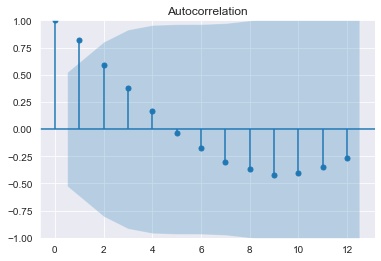

In [72]:
sm.graphics.tsa.plot_acf(df_new.FLOW, lags=12).plot()

/Users/prateekrao/miniforge3/envs/mlb/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


AttributeError: 'Figure' object has no attribute 'plot'

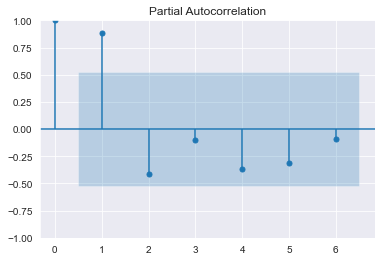

In [73]:
sm.graphics.tsa.plot_pacf(df_new.FLOW, lags=6).plot()

In [74]:
df_new = df_new.drop("Differencing", axis = 1)

KeyError: "['Differencing'] not found in axis"

In [75]:
df_new.index = pd.to_datetime(df_new.index, format="%Y")

In [147]:
df_new.describe

<bound method NDFrame.describe of                     FLOW      forecast
year                                  
2001-01-01  1.821455e+10           NaN
2002-01-01  1.818276e+10           NaN
2003-01-01  2.078663e+10           NaN
2004-01-01  2.443822e+10           NaN
2005-01-01  2.694688e+10           NaN
2006-01-01  3.224296e+10           NaN
2007-01-01  3.498284e+10           NaN
2008-01-01  4.445431e+10           NaN
2009-01-01  4.992364e+10           NaN
2010-01-01  6.598572e+10           NaN
2011-01-01  7.437514e+10  7.128160e+10
2012-01-01  8.143390e+10  7.655271e+10
2013-01-01  9.401673e+10  8.179916e+10
2014-01-01  9.367307e+10  8.702108e+10>

In [151]:
df_new = df_new.drop("forecast", axis=1)

In [156]:
df_new.FLOW.iloc[:10]

year
2001-01-01    1.821455e+10
2002-01-01    1.818276e+10
2003-01-01    2.078663e+10
2004-01-01    2.443822e+10
2005-01-01    2.694688e+10
2006-01-01    3.224296e+10
2007-01-01    3.498284e+10
2008-01-01    4.445431e+10
2009-01-01    4.992364e+10
2010-01-01    6.598572e+10
Name: FLOW, dtype: float64

In [247]:
model = ARIMA(np.log(df_new.FLOW.iloc[:10]), order=(2,0,2))

/Users/prateekrao/miniforge3/envs/mlb/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/prateekrao/miniforge3/envs/mlb/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/prateekrao/miniforge3/envs/mlb/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


In [248]:
arima_model = model.fit()

/Users/prateekrao/miniforge3/envs/mlb/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/prateekrao/miniforge3/envs/mlb/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/prateekrao/miniforge3/envs/mlb/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [249]:
df_new['forecast'] = arima_model.predict(start = 10, end =15, dynamic=True)

In [250]:
df_new.forecast = np.exp(df_new.forecast)

In [251]:
df_new

,FLOW,forecast
year,,
2001-01-01,1.821455e+10,NaN
2002-01-01,1.818276e+10,NaN
2003-01-01,2.078663e+10,NaN
2004-01-01,2.443822e+10,NaN
2005-01-01,2.694688e+10,NaN
2006-01-01,3.224296e+10,NaN
2007-01-01,3.498284e+10,NaN
2008-01-01,4.445431e+10,NaN
2009-01-01,4.992364e+10,NaN


<AxesSubplot:xlabel='year'>

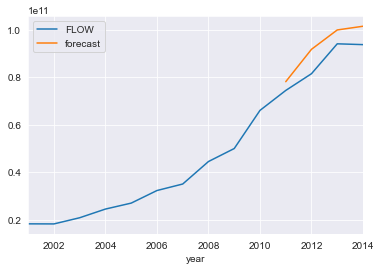

In [252]:
df_new[["FLOW", "forecast"]].plot()

In [253]:
df_new

,FLOW,forecast
year,,
2001-01-01,1.821455e+10,NaN
2002-01-01,1.818276e+10,NaN
2003-01-01,2.078663e+10,NaN
2004-01-01,2.443822e+10,NaN
2005-01-01,2.694688e+10,NaN
2006-01-01,3.224296e+10,NaN
2007-01-01,3.498284e+10,NaN
2008-01-01,4.445431e+10,NaN
2009-01-01,4.992364e+10,NaN


In [274]:
df_new["Difference"] = df_new.FLOW.diff().diff()

In [275]:
df_new

,FLOW,forecast,Difference
year,,,
2001-01-01,1.821455e+10,NaN,NaN
2002-01-01,1.818276e+10,NaN,NaN
2003-01-01,2.078663e+10,NaN,2.635657e+09
2004-01-01,2.443822e+10,NaN,1.047731e+09
2005-01-01,2.694688e+10,NaN,-1.142946e+09
2006-01-01,3.224296e+10,NaN,2.787435e+09
2007-01-01,3.498284e+10,NaN,-2.556209e+09
2008-01-01,4.445431e+10,NaN,6.731594e+09
2009-01-01,4.992364e+10,NaN,-4.002141e+09


<AxesSubplot:xlabel='year'>

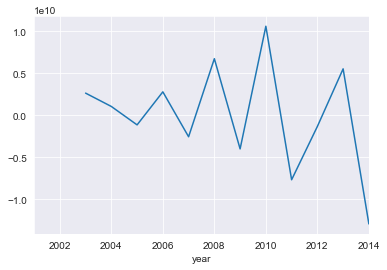

In [276]:
df_new.Difference.plot()

In [277]:
adf_test(df_new['Difference'].dropna())

Test parameters : -3.141036831084216
p-value : 0.023661605312100962
#Lags Used : 3
Dataset observations : 8
Dataset is stationary


In [281]:
df_new.Difference.dropna()

year
2003-01-01    2.635657e+09
2004-01-01    1.047731e+09
2005-01-01   -1.142946e+09
2006-01-01    2.787435e+09
2007-01-01   -2.556209e+09
2008-01-01    6.731594e+09
2009-01-01   -4.002141e+09
2010-01-01    1.059275e+10
2011-01-01   -7.672668e+09
2012-01-01   -1.330651e+09
2013-01-01    5.524075e+09
2014-01-01   -1.292650e+10
Name: Difference, dtype: float64

AttributeError: 'Figure' object has no attribute 'plot'

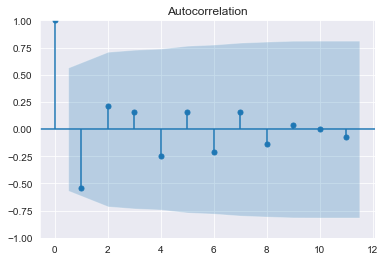

In [291]:
sm.graphics.tsa.plot_acf(df_new.Difference.dropna(), lags=11).plot()

AttributeError: 'Figure' object has no attribute 'plot'

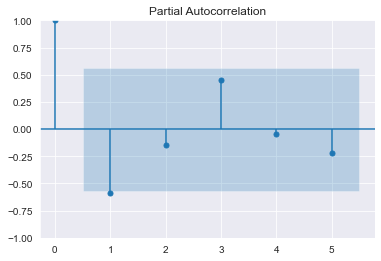

In [293]:
sm.graphics.tsa.plot_pacf(df_new.Difference.dropna(), lags=5).plot()

In [280]:
df_new

,FLOW,forecast,Difference
year,,,
2001-01-01,1.821455e+10,NaN,NaN
2002-01-01,1.818276e+10,NaN,NaN
2003-01-01,2.078663e+10,NaN,2.635657e+09
2004-01-01,2.443822e+10,NaN,1.047731e+09
2005-01-01,2.694688e+10,NaN,-1.142946e+09
2006-01-01,3.224296e+10,NaN,2.787435e+09
2007-01-01,3.498284e+10,NaN,-2.556209e+09
2008-01-01,4.445431e+10,NaN,6.731594e+09
2009-01-01,4.992364e+10,NaN,-4.002141e+09


# NEW ARIMA - SUS

In [299]:
new_odel = ARIMA(np.log(df_new.FLOW.iloc[:10]), order=(0,2,0))

/Users/prateekrao/miniforge3/envs/mlb/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/prateekrao/miniforge3/envs/mlb/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/prateekrao/miniforge3/envs/mlb/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


In [300]:
arima_model_new = new_odel.fit()

In [301]:
df_new['forecast_yodel'] = arima_model_new.predict(start = 10, end =15, dynamic=True)

In [303]:
df_new.forecast_yodel = np.exp(df_new.forecast_yodel)

In [304]:
df_new

,FLOW,forecast,Difference,forecast_yodel
year,,,,
2001-01-01,1.821455e+10,NaN,NaN,NaN
2002-01-01,1.818276e+10,NaN,NaN,NaN
2003-01-01,2.078663e+10,NaN,2.635657e+09,NaN
2004-01-01,2.443822e+10,NaN,1.047731e+09,NaN
2005-01-01,2.694688e+10,NaN,-1.142946e+09,NaN
2006-01-01,3.224296e+10,NaN,2.787435e+09,NaN
2007-01-01,3.498284e+10,NaN,-2.556209e+09,NaN
2008-01-01,4.445431e+10,NaN,6.731594e+09,NaN
2009-01-01,4.992364e+10,NaN,-4.002141e+09,NaN
